# App Stat Exam2023    -    **Exam Number: 100**

## Importing libraries:

In [122]:
#Other good imports                        
from numpy.linalg import matrix_power                                                                       
from iminuit import Minuit                                                                 
from scipy.integrate import quad
import sympy as sp
from sympy import integrate , print_latex
import pandas as pd
from IPython.display import display


#Packages needed for the external functions
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc
from iminuit.util import make_func_code
from iminuit import describe 


# import sequence of functions from external file
import sys 
# sys.path.append('../External_Functions')
from MyExternalFunctionsForExam import *


# Set the seed for the random number generator
r = np.random
r.seed(12345)


Matplotlib_settings()

## plt.savefig('.pdf')                     #Save the figure as pdf command
## np.loadtxt('.txt')                      OPTIONAL: skiprows=#, usecols=(#,#,#,#), comments='#', delimiter=',' 
## - alternative: np.genfromtxt('.txt', skip_header=1, skip_footer=4)

## 1) Distributions and probabilities

### 1.1) 

In [123]:
#Two gaussian distributions with mu=50 and sigma=20
mu = 50
sigma = 20


#1.1.1)
Frac_between_55_and_65 = stats.norm.cdf(65,mu,sigma)-stats.norm.cdf(55,mu,sigma)
print(Frac_between_55_and_65)

#1.1.2) 
#Here we do get the actual real mu and sigma values, so no loss in ndof for estimating. 
error_on_mean = sigma/np.sqrt(120)
print(error_on_mean)

#1.1.3)


# Correlation coefficient
rho = 0.60

# Z-score for a score of 60
z = (60 - mu) / sigma

new_mu = rho*z
new_sigma = np.sqrt(1 - rho**2)

# Bivariate normal cumulative distribution function
p = stats.norm.cdf(z, new_mu, new_sigma)

# Probability of getting a score above 60 in both tests
prob = p**2
print(prob)


0.17466632194020804
1.8257418583505538
0.3584492644127471


### 1.2)

In [124]:
win_rate = 0.4 
min_wins = 11
N_games = 20 

chance_of_winning = stats.binom.sf(min_wins-1, N_games, win_rate)
print(chance_of_winning)

0.12752124614721674


## 2) Error Propagation

### 2.1) 

In [125]:
# Let x = 1.033±0.014 and y = 0.07±0.23, and let z1 = xye**(−y) and z2 = (y + 1)**3/(x−1)

x_value = 1.033
x_error = 0.014
y_value = 0.07
y_error = 0.23

z1_string = 'x*y*exp(-y)'
z2_string = '(y+1)**3/(x-1)'


#2.1.1) contribution to the error on z1

z1_err_eq , z1_func , z1_errfunc , z1_contrib = Errorpropagation(z1_string, 'x y')

symbols = sp.symbols('x y sigma_x sigma_y')
sigmax = sp.lambdify(symbols,z1_contrib[0])
sigmay = sp.lambdify(symbols,z1_contrib[1])
print_latex(z1_contrib[0])
print_latex(z1_contrib[1])
print_latex(z1_err_eq)

print(f'sigma_x = {sigmax(x_value,y_value,x_error,y_error):.3}')
print(f'sigma_y = {sigmay(x_value,y_value,x_error,y_error):.3}')
print(f'sigma_z1 = {z1_errfunc(x_value,y_value,x_error,y_error):.5}')

\sigma_{x}^{2} y^{2} e^{- 2 y}
\sigma_{y}^{2} x^{2} \left(y - 1\right)^{2} e^{- 2 y}
\sqrt{\left(\sigma_{x}^{2} y^{2} + \sigma_{y}^{2} x^{2} \left(y - 1\right)^{2}\right) e^{- 2 y}}
sigma_x = 8.35e-07
sigma_y = 0.0424
sigma_z1 = 0.20602


In [126]:
z2_err_eq , z2_func , z2_errfunc , z2_contrib = Errorpropagation(z2_string, 'x y')

print_latex(z2_err_eq)
print(f'sigma_z2 = {z2_errfunc(x_value,y_value,x_error,y_error):.4}')
22.79-28.65

\sqrt{\frac{\left(y + 1\right)^{4} \left(\sigma_{x}^{2} \left(y + 1\right)^{2} + 9 \sigma_{y}^{2} \left(x - 1\right)^{2}\right)}{\left(x - 1\right)^{4}}}
sigma_z2 = 28.65


-5.859999999999999

In [127]:
#2.1.2) Errors on z1 and z2 with rho_xy = 0.4 

rho_xy = 0.4

z1_err_eq , z1_func , z1_errfunc = Errorpropagation(z1_string, 'x y', rho=rho_xy)
z2_err_eq , z2_func , z2_errfunc = Errorpropagation(z2_string, 'x y', rho=rho_xy)

print_latex(z1_err_eq)
print_latex(z2_err_eq)


print(f'sigma_z1 = {z1_errfunc(x_value,y_value,x_error,y_error):.4}')
print(f'sigma_z2 = {z2_errfunc(x_value,y_value,x_error,y_error):.4}')


\sqrt{\left(\sigma_{x}^{2} y^{2} - 0.8 \sigma_{x} \sigma_{y} x y \left(y - 1\right) + \sigma_{y}^{2} x^{2} \left(y - 1\right)^{2}\right) e^{- 2 y}}
\sqrt{\frac{\left(y + 1\right)^{4} \left(\sigma_{x}^{2} \left(y + 1\right)^{2} - 2.4 \sigma_{x} \sigma_{y} \left(x - 1\right) \left(y + 1\right) + 9 \sigma_{y}^{2} \left(x - 1\right)^{2}\right)}{\left(x - 1\right)^{4}}}
sigma_z1 = 0.2064
sigma_z2 = 22.79


In [128]:
#pearson correlation coefficient between z1 and z2 on the domain z1,z2 in [-1,1] without stats 

z1 = z1_func(x_value,y_value)
z2 = z2_func(x_value,y_value)

# z1 = np.linspace(-1,1,10)
# z2 = np.linspace(-1,1,10)

rho = (z1*z2)/(z1_errfunc(x_value,y_value,x_error,y_error)*z2_errfunc(x_value,y_value,x_error,y_error))

# rho = np.cov(z1,z2)[0,1]/(np.std(z1)*np.std(z2))

print(f'rho = {rho:.3}')

rho = 0.532


### 2.2) 

weighted mean = 5.279 +- 0.06005
Bootstrap std = 0.3066
Bootstrap mean = 5.263 +- 0.1371


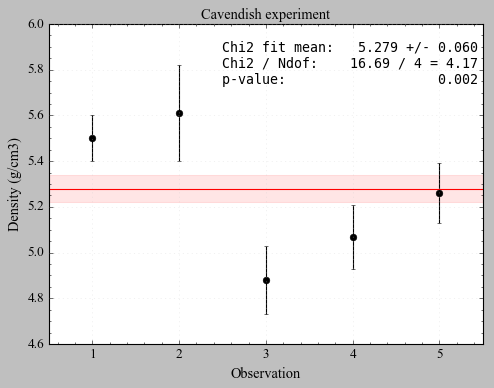

In [129]:
# Observation 1 2 3 4 5
# Result (in g/cm3) 5.50 ± 0.10 5.61 ± 0.21 4.88 ± 0.15 5.07 ± 0.14 5.26 ± 0.13

density = np.array([5.50, 5.61, 4.88, 5.07, 5.26])
density_error = np.array([0.10, 0.21, 0.15, 0.14, 0.13])

#weighting the mean with the inverse of the error squared
weighted_mean = np.sum(density/density_error**2)/np.sum(1/density_error**2)
weighted_mean_error = np.sqrt(1/np.sum(1/density_error**2))

print(f'weighted mean = {weighted_mean:.4} +- {weighted_mean_error:.4}')


#chi2 fit with constant 

def const(x, a):
    return a

Chi2_cavendish = Chi2Regression(const, range(1,6), density, density_error)
minuit = Minuit(Chi2_cavendish, a=5.0)
minuit.migrad()
chi_mean , chi_mean_error = minuit.values['a'] , minuit.errors['a']

fig, ax = plt.subplots(figsize=(7, 5))
ax.errorbar(range(1,6), density, yerr=density_error, fmt='o',mec='k',mfc='k', ecolor = 'k', label='data')
ax.axhline(const(range(1,6), chi_mean), c='r', label=r'$\chi^2$ fit')
ax.axhspan(chi_mean-chi_mean_error, chi_mean+chi_mean_error, color='r', alpha=0.1)
ax.set(xlabel='Observation', ylabel='Density (g/cm3)', title='Cavendish experiment', xlim=(0.5,5.5))

pval , chi2string = Chi2prob(minuit, len(density))

d = {'Chi2 fit mean:': [chi_mean, chi_mean_error], r'Chi2 / Ndof:': chi2string , 'p-value:': pval}
text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.4, 0.95, text, ax, fontsize=12)

# plt.savefig('221_Cavendish_chi2_mean.pdf')




# generate bootstrap samples
N_points = 1000
Gaussians = np.array([r.normal(density, density_error) for _ in range(N_points)])
Gaussians = Gaussians.flatten()


# calculate the mean and standard deviation of the bootstrap samples
Bootstrap_mean = np.mean(Gaussians)
Bootstrap_std = np.std(Gaussians)
Bootstrap_mean_error = np.std(Gaussians,ddof=1)/np.sqrt(5) # massive underestimate of the error"
print(f'Bootstrap std = {Bootstrap_std:.4}')
print(f'Bootstrap mean = {Bootstrap_mean:.4} +- {Bootstrap_mean_error:.4}')



In [130]:
#how many standard deviations away from 5.514 is the weighted mean and the bootstrap mean?

print(f'weighted mean is {abs(weighted_mean-5.514)/weighted_mean_error:.2f} standard deviations away from the true value')

print(f'bootstrap mean is {abs(Bootstrap_mean-5.514)/Bootstrap_mean_error:.2f} standard deviations away from the true value')

weighted mean is 3.91 standard deviations away from the true value
bootstrap mean is 1.83 standard deviations away from the true value


### 2.3)



In [131]:
# An ellipse E has semi-major axis a = 1.04 ± 0.27 and eccentricity e = 0.71 ± 0.12.
# 2.3.1) The area A of an ellipse is generally A = πa2√(1 − e)
#What is the area of the ellipse E?

a = 1.04
a_error = 0.27
e = 0.71
e_error = 0.12

area_string = 'pi*a**2*sqrt(1-e**2)'
area_err_eq , area_func , area_errfunc, area_contrib = Errorpropagation(area_string, 'a e')

print_latex(area_err_eq)

print(f'area = {area_func(a,e):.4} +- {area_errfunc(a,e,a_error,e_error):.4}')

\pi \sqrt{\frac{a^{2} \left(- a^{2} e^{2} \sigma_{e}^{2} - 4 \sigma_{a}^{2} \left(e^{2} - 1\right)^{2}\right)}{e^{2} - 1}}
area = 2.393 +- 1.309


In [132]:
# 2.3.2) Circumfrence 
    #C ≈ π * (3(a + b) - √((3a + b)(a + 3b)))
# b = a*sqrt(1-e**2)
Ramanujan_string = 'pi*(3*(a + a*sqrt(1-e**2))-sqrt((3*a+a*sqrt(1-e**2))*(a+3*a*sqrt(1-e**2))))'
C_rama = sp.simplify(Ramanujan_string)
print_latex(C_rama)

C_eq , C_func , C_errfunc, C_contrib = Errorpropagation(Ramanujan_string, 'a e')

print_latex(C_eq)

\pi \left(3 a \sqrt{1 - e^{2}} + 3 a - \sqrt{a^{2} \left(- 3 e^{2} + 10 \sqrt{1 - e^{2}} + 6\right)}\right)
\pi \sqrt{\frac{a^{2} e^{2} \sigma_{e}^{2} \left(3 a \left(\sqrt{1 - e^{2}} + 3\right) \left(3 \sqrt{1 - e^{2}} + 1\right) - \sqrt{a^{2} \left(\sqrt{1 - e^{2}} + 3\right) \left(3 \sqrt{1 - e^{2}} + 1\right)} \left(3 \sqrt{1 - e^{2}} + 5\right)\right)^{2} + \sigma_{a}^{2} \cdot \left(1 - e^{2}\right) \left(3 a \left(\sqrt{1 - e^{2}} + 1\right) - \sqrt{a^{2} \left(\sqrt{1 - e^{2}} + 3\right) \left(3 \sqrt{1 - e^{2}} + 1\right)}\right)^{2} \left(\sqrt{1 - e^{2}} + 3\right)^{2} \left(3 \sqrt{1 - e^{2}} + 1\right)^{2}}{a^{2} \cdot \left(1 - e^{2}\right) \left(\sqrt{1 - e^{2}} + 3\right)^{2} \left(3 \sqrt{1 - e^{2}} + 1\right)^{2}}}


In [133]:
Cval = C_func(a,e)
Cerr = C_errfunc(a,e,a_error,e_error)

low = 4*a*np.sqrt(2-e**2)
high = np.pi*a*np.sqrt(4-2*e**2)

print(f'C = {Cval:.4} +- {Cerr:.4}')
print(f'low bound = {low:.4} and high bound = {high:.4}')

C = 5.61 +- 1.5
low bound = 5.088 and high bound = 5.651


## 3) Simulation / Monte Carlo 

### 3.1)

fraction of containers that have to wait = 0.343


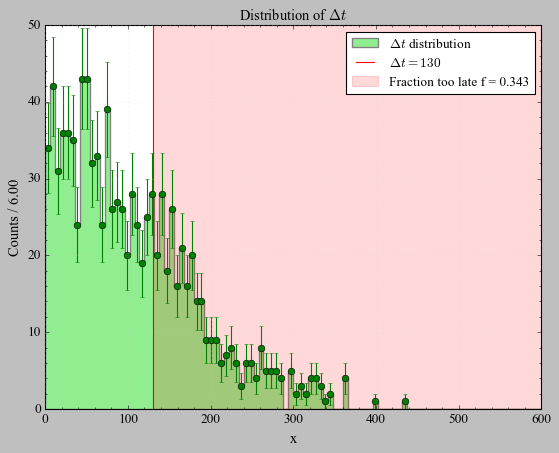

In [227]:
# Simulation / Monte Carlo:
# 3.1 (8 points) You are optimising container transport, in particular the time, ∆t, between the daily
# truck arrivals (120 minutes uncertainty) and the ship departure (50 minutes uncertainty).

truck_arrival_spread = 120
ship_departure_spread = 50

# 3.1.1) If ∆t = 130 minutes, what fraction of containers will have to wait to the next day?   


def Delta_t_func(truck_arrival, ship_departure):
    return ship_departure - truck_arrival


#randomly generate N truck arrival times and N ship departure times but only accept if the delta_t is positive

N_points = 1000
delta_t = []
n_accepted = 0

while n_accepted < N_points:
    truck_arrival = r.normal(0, truck_arrival_spread)
    ship_departure = r.normal(0, ship_departure_spread)
    dt = Delta_t_func(truck_arrival, ship_departure)
    if  dt > 0:
        delta_t.append(dt)
        n_accepted += 1


#calculate the fraction of containers that have to wait
fraction = np.sum(np.array(delta_t) > 130)/N_points
print(f'fraction of containers that have to wait = {fraction:.4}')

fig, ax, counts, bins , binwidth = easy_hist(delta_t, Nbins=100,xrange=(0,600), Figsize=(8,6),title='Distribution of $\Delta t$');
ax.axvline(130, c='r', label=r'$\Delta t = 130$')
ax.axvspan(130, 600, color='r', alpha=0.15, label=f'Fraction too late f = {fraction:.4}')
ax.legend([r'$\Delta t $ distribution', r'$\Delta t = 130$', f'Fraction too late f = {fraction:.4}'])

# plt.savefig('311_dt130_late_frac.pdf')

In [246]:
fractions = []

for i in range(10,10000, 10):
    N_points = 1000
    delta_t = []
    n_accepted = 0
    r.seed(i)

    while n_accepted < N_points:
        truck_arrival = r.normal(0, truck_arrival_spread)
        ship_departure = r.normal(0, ship_departure_spread)
        dt = Delta_t_func(truck_arrival, ship_departure)
        if  dt > 0:
            delta_t.append(dt)
            n_accepted += 1

    fractions.append(np.sum(np.array(delta_t) > 130)/N_points)


r.seed(12345)
    

fraction mean = 0.3175 +- 0.0004863


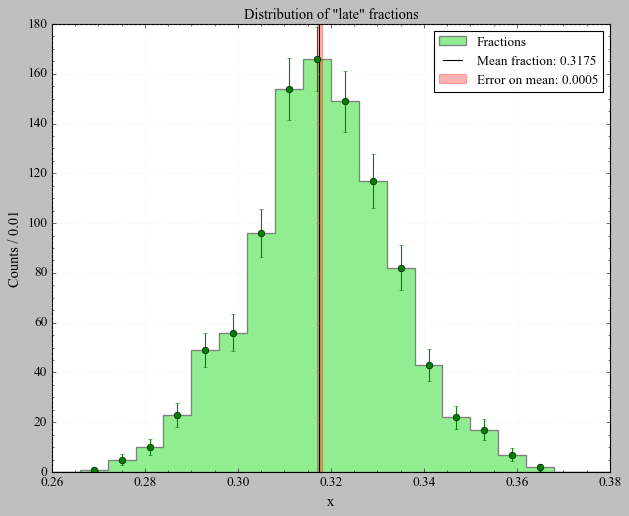

In [230]:
fraction_mean = np.mean(fractions)
fraction_std = np.std(fractions, ddof=1)
fraction_error = fraction_std/np.sqrt(len(fractions))

print(f'fraction mean = {fraction_mean:.4} +- {fraction_error:.4}')

fig, ax, counts, bins , binwidth = easy_hist(fractions, Nbins=20,xrange=(0.26,0.38), Figsize=(9,7),title='Distribution of "late" fractions');
ax.axvline(fraction_mean, c='k', label=f'Fraction too late f = {fraction_mean:.4} +- {fraction_error:.4}')
ax.axvspan(fraction_mean-fraction_error, fraction_mean+fraction_error, color='r', alpha=0.3, label=f'Fraction too late f = {fraction_mean:.4} +- {fraction_error:.4}')
ax.legend(['Fractions', f'Mean fraction: {fraction_mean:.4f}', f'Error on mean: {fraction_error:.4f}'])
# plt.savefig('311_dt130_fracDistribution.pdf')

In [135]:
# 3.1.2) For what value of ∆t do containers, on average, have the least waiting time?

### 3.2)

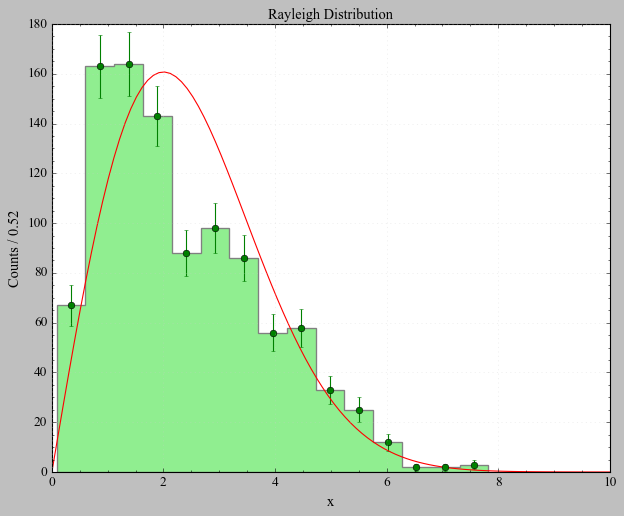

In [318]:
import numpy as np

def rayleigh(x, sigma):
    y = (x/sigma**2) * np.exp(-x**2/(2*sigma**2))
    return y


def rayleigh_distribution(sigma, N_accepted):
    accepted = []
    N_try = 0
    c = (2*sigma**2)**(-0.5)
    while len(accepted) < N_accepted:
        x = r.exponential(1/c)
        y = r.uniform(0, c*np.exp(-c*x))
        if y <= rayleigh(x, sigma):
            accepted.append(x)
        N_try += 1

    return accepted , N_try

sigma = 2
n_samples = 1000
samples = rayleigh_distribution(sigma, n_samples)


fig, ax, counts, bins , binwidth = easy_hist(samples[0], Nbins=15, Figsize=(9,7),title='Rayleigh Distribution');
x = np.linspace(0, 10, 100)

ax.plot(x, 530*rayleigh(x, sigma), c='r', label='Rayleigh distribution')


## 4) Statistical Tests

### 4.1)

1.2361494109820825
0.7201467448408749
0.1539992102647609
KstestResult(statistic=0.1325, pvalue=0.0017621899205092087)
15.313721236337322


0.0

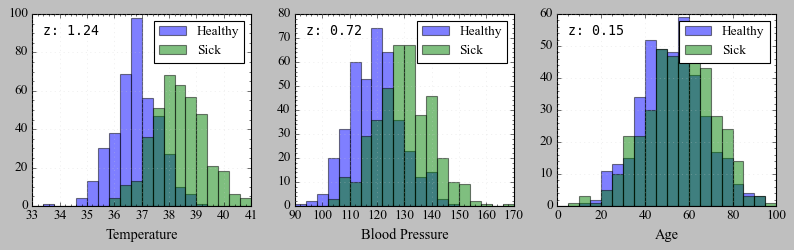

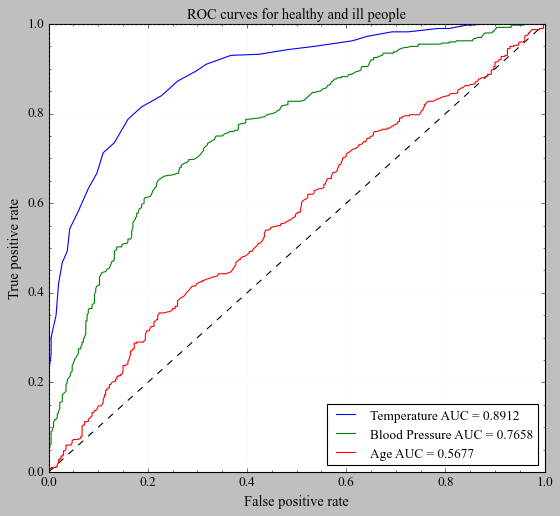

In [556]:
dataframe = pd.read_csv('data_AnorocDisease.csv', header=0)
unknown = dataframe[800:]
ID2, Temp2, BloodP2, Age2, Status2 = unknown.values.T



known = dataframe[0:800]


ID1, Temp1, BloodP1, Age1, Status1 = known.values.T
healthy1 = Status1==0
sick1 = Status1==1

fig, ax = plt.subplots(1,3, figsize=(12,3))
ax[0].hist(Temp1[healthy1], bins=20,range=(33,41), alpha=0.5, label='Healthy')
ax[0].hist(Temp1[sick1], bins=20, range=(33,41),alpha=0.5, label='Sick')
ax[0].set_xlabel('Temperature')
ax[0].legend()

ax[1].hist(BloodP1[healthy1], bins=20,range=(90,170), alpha=0.5, label='Healthy')
ax[1].hist(BloodP1[sick1], bins=20, range=(90,170),  alpha=0.5, label='Sick')
ax[1].set_xlabel('Blood Pressure')
ax[1].legend()

ax[2].hist(Age1[healthy1], bins=20,range=(0,100), alpha=0.5, label='Healthy')
ax[2].hist(Age1[sick1], bins=20,range=(0,100), alpha=0.5, label='Sick')
ax[2].set_xlabel('Age')
ax[2].legend()

temp_sep = np.abs(Healthy1.T[0].mean() - Sick1.T[0].mean()) / np.sqrt(np.std(Healthy1.T[0])**2 + np.std(Sick1.T[0])**2)
bloodp_sep = np.abs(Healthy1.T[1].mean() - Sick1.T[1].mean()) / np.sqrt(np.std(Healthy1.T[1])**2 + np.std(Sick1.T[1])**2)
age_sep = np.abs(Healthy1.T[2].mean() - Sick1.T[2].mean()) / np.sqrt(np.std(Healthy1.T[2])**2 + np.std(Sick1.T[2])**2)
print(temp_sep)
print(bloodp_sep)
print(age_sep)

d1 ={'z:':temp_sep}
d2 ={'z:':bloodp_sep}
d3 ={'z:':age_sep}
text1 = nice_string_output(d1, extra_spacing=0, decimals=2)
text2 = nice_string_output(d2, extra_spacing=0, decimals=2)
text3 = nice_string_output(d3, extra_spacing=0, decimals=2)
add_text_to_ax(0.05, 0.95, text1, ax[0], fontsize=12)
add_text_to_ax(0.05, 0.95, text2, ax[1], fontsize=12)
add_text_to_ax(0.05, 0.95, text3, ax[2], fontsize=12)


# plt.savefig('411_raw_hist.pdf',bbox_inches='tight')

Temp_fpr, Temp_tpr, Temp_auc = ROC_curve(Temp1[healthy1],Temp1[sick1], plot=False)
BloodP_fpr, BloodP_tpr, BloodP_auc = ROC_curve(BloodP1[healthy1],BloodP1[sick1], plot=False)
Age_fpr, Age_tpr, Age_auc = ROC_curve(Age1[healthy1],Age1[sick1], plot=False)

fig,ax = plt.subplots(figsize=(8,7))
ax.plot([0,1],[0,1], 'k--')
ax.plot(Temp_fpr, Temp_tpr, label=f'Temperature AUC = {Temp_auc:.4}')
ax.plot(BloodP_fpr, BloodP_tpr, label=f'Blood Pressure AUC = {BloodP_auc:.4}')
ax.plot(Age_fpr, Age_tpr, label=f'Age AUC = {Age_auc:.4}')
ax.set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curves for healthy and ill people')
ax.legend(loc='best');

# plt.savefig('411_ROC.pdf',bbox_inches='tight')

#4.1.2) test if the two distributions are the same in age with a KS test

print(stats.ks_2samp(Age1[healthy1], Age1[sick1]))

#chi2 test for the same distribution

chi2 = np.sum((Age1[healthy1]- Age1[sick1])**2)/np.sqrt(np.std(Age1[healthy1])*np.std(Age1[sick1]))
print(chi2/(len(Age1[healthy1])+len(Age1[sick1])))
stats.chi2.sf(chi2,len(Age1[healthy1])+len(Age1[sick1]))



1.2361494109820825
0.7201467448408749
0.1539992102647609


array([-0.93810394, -0.02806819, -0.01381178])

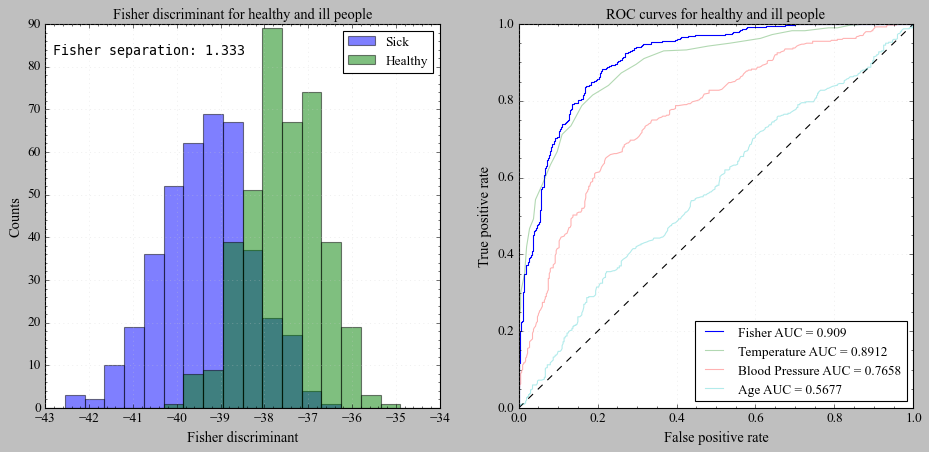

In [552]:
#4.1.3) 

Healthy1 = np.array([Temp1[healthy1], BloodP1[healthy1], Age1[healthy1]]).T
Sick1 = np.array([Temp1[sick1], BloodP1[sick1], Age1[sick1]]).T


fish_H, fish_I, sample_sep, fish_sep, w1 = fisher_2var(Healthy1,Sick1)

fish_fpr, fish_tpr, fish_auc = ROC_curve(fish_I,fish_H, plot=False)

fig,ax = plt.subplots(1,2,figsize=(14,6))
ax[0].hist(fish_I, bins=20, range=(-43,-34),alpha=0.5, label='Sick')
ax[0].hist(fish_H, bins=20, range=(-43,-34),alpha=0.5, label='Healthy')
ax[0].set(xlabel='Fisher discriminant', ylabel='Counts', title='Fisher discriminant for healthy and ill people')
d = {'Fisher separation:': fish_sep}
text = nice_string_output(d, extra_spacing=0, decimals=3)
add_text_to_ax(0.02, 0.95, text, ax[0], fontsize=12)
ax[0].legend(loc='best')


ax[1].plot([0,1],[0,1], 'k--')
ax[1].plot(fish_fpr, fish_tpr, label=f'Fisher AUC = {fish_auc:.4}')
ax[1].plot(Temp_fpr, Temp_tpr,'-', label=f'Temperature AUC = {Temp_auc:.4}',alpha=0.3)
ax[1].plot(BloodP_fpr, BloodP_tpr,'-', label=f'Blood Pressure AUC = {BloodP_auc:.4}',alpha=0.3)
ax[1].plot(Age_fpr, Age_tpr,'-', label=f'Age AUC = {Age_auc:.4}',alpha=0.3)
ax[1].set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curves for healthy and ill people')
ax[1].legend(loc='best');



# plt.savefig('412_fisher.pdf',bbox_inches='tight')
 
#separation before fisher 

temp_sep = np.abs(Healthy1.T[0].mean() - Sick1.T[0].mean()) / np.sqrt(np.std(Healthy1.T[0])**2 + np.std(Sick1.T[0])**2)
bloodp_sep = np.abs(Healthy1.T[1].mean() - Sick1.T[1].mean()) / np.sqrt(np.std(Healthy1.T[1])**2 + np.std(Sick1.T[1])**2)
age_sep = np.abs(Healthy1.T[2].mean() - Sick1.T[2].mean()) / np.sqrt(np.std(Healthy1.T[2])**2 + np.std(Sick1.T[2])**2)
print(temp_sep)
print(bloodp_sep)
print(age_sep)


w1

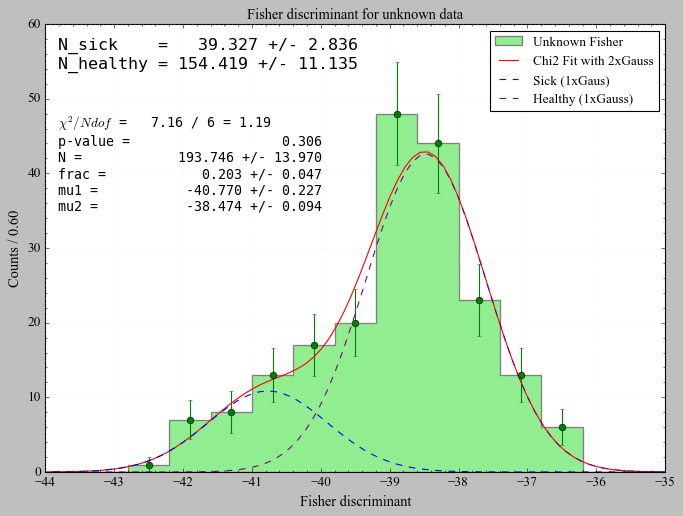

In [551]:
unknown1 = np.array([Temp2, BloodP2, Age2]).T
fish_unknown = np.dot(unknown1, w1)

fig,ax,counts,bincenters,binwidth = easy_hist(fish_unknown, Nbins=15, xrange=(-44,-35),Figsize=(10,7) ,title='Unknown data');

def gaussian(x, mu, sigma):
    return stats.norm.pdf(x, mu, sigma)

def double_gaussian(x,N,f, mu1, sigma, mu2):
    return N*binwidth*(f*gaussian(x, mu1, sigma) + (1-f)*gaussian(x, mu2, sigma))

Chi2 = Chi2Regression(double_gaussian, bincenters, counts, np.sqrt(counts))
minuit = Minuit(Chi2, N=200, f=0.5, mu1=-41, sigma=1, mu2=-38.5)
minuit.migrad()
N , f, mu1, sigma, mu2 , N_err , f_err, mu1_err, sigma_err, mu2_err = *minuit.values , *minuit.errors

pval , chistring = Chi2prob(minuit, len(counts))
d = {r'$\chi^2/Ndof$ =': chistring, 'p-value =': pval, 'N =':[N,N_err] ,'frac =': [f,f_err], 'mu1 =': [mu1,mu1_err], 'mu2 =': [mu2,mu2_err]}
text = nice_string_output(d, extra_spacing=0, decimals=3)
add_text_to_ax(0.02, 0.8, text, ax, fontsize=12)

x = np.linspace(-45,-34,100)
ax.plot(x, double_gaussian(x, *minuit.values), 'r-')
ax.plot(x, N*binwidth*f*gaussian(x, mu1, sigma), '--', color='blue')
ax.plot(x, N*binwidth*(1-f)*gaussian(x, mu2, sigma), '--', color='purple')
ax.set(xlabel='Fisher discriminant', title='Fisher discriminant for unknown data', xlim=(-44,-35))
ax.legend(['Unknown Fisher','Chi2 Fit with 2xGauss', 'Sick (1xGaus)', 'Healthy (1xGauss)'], loc='best');

N_sick = N*f
N_healthy = N*(1-f)
N_sick_err = N_err*f
N_healthy_err = N_err*(1-f)


d_conclusion = {'N_sick    =': [N_sick,N_sick_err], 'N_healthy =': [N_healthy,N_healthy_err]}
text = nice_string_output(d_conclusion, extra_spacing=1, decimals=3)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=15)

# plt.savefig('413_Unkown_fisher.pdf',bbox_inches='tight')


p_T_given_sick = 0.38776203056583447


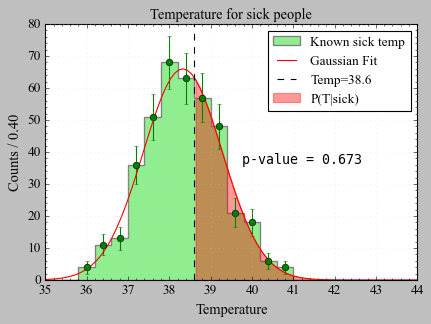

In [550]:
# Assuming a prior probability of p = 0.01 of being ill, what is the probability that a new patient with T = 38.6 C◦ is ill?

p_prior = 0.01

sick_Temp = Sick1.T[0]

fig, ax, counts, bincenters, binwidth = easy_hist(sick_Temp, Nbins=25, xrange=(35,45), Figsize=(6,4), title='Temperature for sick people')

def gaussian(x, mu, sigma,N):
    return N*binwidth*stats.norm.pdf(x, mu, sigma)

Chi2 = Chi2Regression(gaussian, bincenters, counts, np.sqrt(counts))
minuit = Minuit(Chi2, mu=38.5, sigma=1, N=100)
minuit.migrad()
mu , sigma, N , mu_err, sigma_err, N_err = *minuit.values , *minuit.errors

pval , chistring = Chi2prob(minuit, len(counts))
# d = {r'$\chi^2/Ndof$ =': chistring, 'p-value =': pval, 'mu =':[mu,mu_err] ,'sigma =': [sigma,sigma_err], 'N =': [N,N_err]}
d= {'p-value =': pval}
text = nice_string_output(d, extra_spacing=0, decimals=3)
add_text_to_ax(0.53, 0.5, text, ax, fontsize=12)

x = np.linspace(35,45,100)
ax.plot(x, gaussian(x, *minuit.values), 'r-')
ax.axvline(38.6, color='k', linestyle='--')
ax.set(xlabel='Temperature', title='Temperature for sick people', xlim=(35,44))
ax.fill_between(x, gaussian(x, *minuit.values), where=(x>38.6), color='r', alpha=0.4)
ax.legend(['Known sick temp', 'Gaussian Fit','Temp=38.6', 'P(T|sick)'], loc='best');

p_T_given_sick = stats.norm.sf(38.6, mu, sigma)
print('p_T_given_sick =', p_T_given_sick)

# Bayes_prob = p_sick_given_T*p_prior / (p_sick_given_T*p_prior + (1-p_prior))
# print('Bayes_prob =', Bayes_prob)

# plt.savefig('414_Temp_given_sick.pdf',bbox_inches='tight')


p_having_T = 0.1725944282457002
Bayes_prob = 0.02247


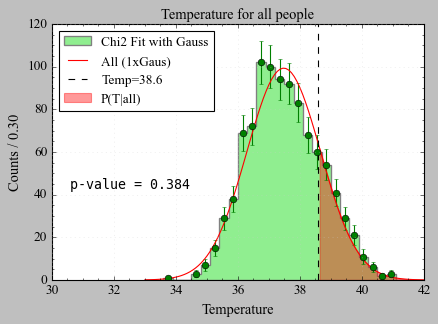

In [549]:
temp_all = np.concatenate((Healthy1.T[0], Sick1.T[0], unknown1.T[0]))
fig, ax, counts, bincenters, binwidth = easy_hist(temp_all, Nbins=30, xrange=(33,42), Figsize=(6,4), title='Temperature for all people')

def gaussian(x, mu, sigma,N):
    return N*binwidth*stats.norm.pdf(x, mu, sigma)

Chi2 = Chi2Regression(gaussian, bincenters, counts, np.sqrt(counts))
minuit = Minuit(Chi2, mu=38.5, sigma=1, N=100)
minuit.migrad()
mu_all , sigma_all, N_all , mu_all_err, sigma_all_err, N_all_err = *minuit.values , *minuit.errors

pval , chistring = Chi2prob(minuit, len(counts))
# d = {r'$\chi^2/Ndof$ =': chistring, 'p-value =': pval, 'mu =':[mu,mu_err] ,'sigma =': [sigma,sigma_err], 'N =': [N,N_err]}
d= {'p-value =': pval}
text = nice_string_output(d, extra_spacing=0, decimals=3)
add_text_to_ax(0.05, 0.4, text, ax, fontsize=12)

x = np.linspace(33,42,100)
ax.plot(x, gaussian(x, *minuit.values), 'r-')
ax.axvline(38.6, color='black', linestyle='--')
ax.set(xlabel='Temperature', title='Temperature for all people', xlim=(30,42))
ax.fill_between(x, gaussian(x, *minuit.values), where=(x>38.6), color='r', alpha=0.4)
ax.legend(['Chi2 Fit with Gauss', 'All (1xGaus)', 'Temp=38.6', 'P(T|all)'], loc='upper left');

p_having_T = stats.norm.sf(38.6, mu_all, sigma_all)
print('p_having_T =', p_having_T)

Bayes_prob = p_T_given_sick*p_prior / p_having_T
print(f'Bayes_prob = {Bayes_prob:.5f}')

# plt.savefig('414_Temp_given_all.pdf',bbox_inches='tight')


### 4.2)

In [566]:
dataframe = pd.read_csv('data_CountryScores.csv', header=1, index_col=None)
Country, GDP, PopSize, HappinessI, EconomicFreedomI, PressFreedomI, EducationI = dataframe.values.T
dataframe





,Afghanistan,592.0,18356000.0,2523.0,53.0,40.19,0.414
0,Albania,5837.0,2187000.0,5117.0,65.2,30.59,0.746
1,Algeria,3638.0,27620000.0,4887.0,49.7,47.26,0.672
2,Argentina,9929.0,30799000.0,5929.0,52.7,28.99,0.855
3,Armenia,4595.0,2176000.0,5283.0,71.9,28.83,0.740
4,Australia,62619.0,19159000.0,7183.0,82.4,19.79,0.924
...,...,...,...,...,...,...,...
127,Uruguay,16965.0,2530000.0,6431.0,69.3,16.38,0.765
128,Venezuela,1627.0,18359000.0,4892.0,24.7,47.60,0.700
129,Vietnam,3743.0,68565000.0,5411.0,61.7,78.46,0.630
130,Zambia,1115.0,8331000.0,4073.0,50.4,38.21,0.557


In [588]:
# Determine the mean, median, 25%, and 75% quantiles of the GDP as well as the corresponding errors 

log_GDP = np.zeros(len(GDP))
for i in range(len(GDP)):
    log_GDP[i] = np.log10(GDP[i])


GDP_mean = np.mean(GDP)
GDP_median = np.median(GDP)
GDP_25 = np.percentile(GDP, 25)
GDP_75 = np.percentile(GDP, 75)
GDP_std = np.std(GDP,ddof=1)

GDP_mean_err = np.std(GDP,ddof=1)/np.sqrt(len(GDP))
GDP_median_err = np.std(GDP,ddof=1)/np.sqrt(len(GDP))
GDP_25_err = np.std(GDP,ddof=1)/np.sqrt(len(GDP))
GDP_75_err = np.std(GDP,ddof=1)/np.sqrt(len(GDP))

print(f'GDP_mean = {GDP_mean:.2f} +/- {GDP_mean_err:.2f}')
print(f'GDP_median = {GDP_median:.2f} +/- {GDP_median_err:.2f}')
print(f'GDP_25 = {GDP_25:.2f} +/- {GDP_25_err:.2f}')
print(f'GDP_75 = {GDP_75:.2f} +/- {GDP_75_err:.2f}')
print(f'GDP_std = {GDP_std:.2f}')


# easy_hist(GDP, Nbins=10, Figsize=(10,6), xrange=(0,200000), title='GDP')


GDP_mean = 17489.09 +/- 2079.00
GDP_median = 6769.00 +/- 2079.00
GDP_25 = 2098.75 +/- 2079.00
GDP_75 = 23935.75 +/- 2079.00
GDP_std = 23885.84


Statistics=0.986, p=0.219
Statistic: 0.563
Critical Values:  [0.56  0.638 0.765 0.892 1.061]
Significance Levels:  [15.  10.   5.   2.5  1. ]


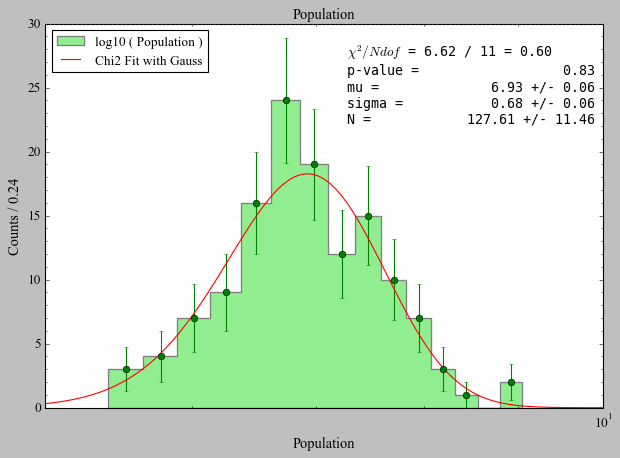

In [657]:
log_Pop = np.zeros(len(PopSize))
for i in range(len(PopSize)): 
    log_Pop[i] = np.log10(PopSize[i])

fig, ax, counts, bincenters, binwidth = easy_hist(log_Pop, Nbins=15,Figsize=(9,6), title='Population')
ax.set(xscale='log', xlim=(5,10) ,xlabel='Population')

gaussian = lambda x, mu, sigma, N: N*binwidth*stats.norm.pdf(x, mu, sigma)
Chi2 = Chi2Regression(gaussian, bincenters, counts, np.sqrt(counts))
minuit = Minuit(Chi2, mu=7.5, sigma=0.5, N=100)
minuit.migrad()
mu , sigma, N , mu_err, sigma_err, N_err = *minuit.values , *minuit.errors

pval , chistring = Chi2prob(minuit, len(counts))
d = {r'$\chi^2/Ndof$ =': chistring, 'p-value =': pval, 'mu =':[mu,mu_err] ,'sigma =': [sigma,sigma_err], 'N =': [N,N_err]}
text = nice_string_output(d, extra_spacing=0, decimals=2)
add_text_to_ax(0.54, 0.95, text, ax, fontsize=12)

x = np.linspace(5,10,100)
ax.plot(x, gaussian(x, *minuit.values), 'r-')
ax.legend(['log10 ( Population )','Chi2 Fit with Gauss'], loc='upper left');

# plt.savefig('422_log10Population.pdf',bbox_inches='tight')

#test for normality of log10(Population) with Shapiro-Wilk test 

stat, p = stats.shapiro(log_Pop)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# test for normality of log10(Population) with Anderson-Darling test

result = stats.anderson(log_Pop, dist='norm')
print('Statistic: %.3f' % result.statistic)
print('Critical Values: ', result.critical_values)
print('Significance Levels: ', result.significance_level)



Pearson correlation = 0.762
Spearman correlation = 0.802


C:\Users\simon\AppData\Local\Temp\ipykernel_5632\4262119004.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(HappinessI, EducationI,bins=10);
C:\Users\simon\AppData\Local\Temp\ipykernel_5632\4262119004.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


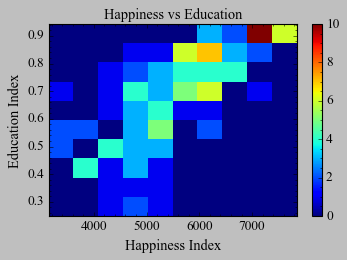

In [711]:
#The Pearson and Spearman correlations between happiness and education 

print(f'Pearson correlation = {stats.pearsonr(HappinessI, EducationI)[0]:.3f}');
print(f'Spearman correlation = {stats.spearmanr(HappinessI, EducationI)[0]:.3f}');



plt.figure(figsize=(5,3))
plt.hist2d(HappinessI, EducationI,bins=10);
plt.colorbar();
plt.xlabel('Happiness Index')
plt.ylabel('Education Index')
plt.title('Happiness vs Education');

# plt.savefig('423_Happiness_vs_Education.pdf',bbox_inches='tight')

# print(np.cov(HappinessI, EducationI)/(np.std(HappinessI)*np.std(EducationI)))




[ 75.33916194 520.30080088 128.85649932] [[37.26054018  9.55668582  3.81948054]
 [ 9.55668582 41.31852199 14.94993505]
 [ 3.81948054 14.94993505  8.32424964]]


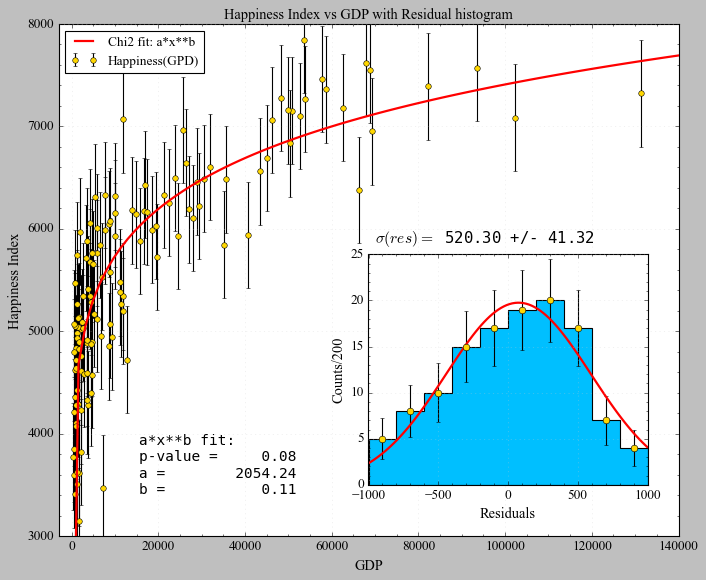

In [857]:
# Plot the Happiness-Index as a function of GDP, and fit the relation between the two. From
# this fit, what would you estimate the uncertainty to be on the Happiness-index?

fig,ax = plt.subplots(figsize=(10,8))
ax.errorbar(GDP, HappinessI, yerr=par[1], fmt='o',ecolor='k',mfc='gold',ms=5, label='Data',c='blue')
ax.set(xlabel='GDP', ylabel='Happiness Index', title='Happiness Index vs GDP with Residual histogram')


exp = lambda x, a, b: a*x**b
Chi2 = Chi2Regression(exp, GDP, HappinessI, par[1])
minuit = Minuit(Chi2, a=1, b=1)
minuit.migrad()
a , b , a_err, b_err = *minuit.values , *minuit.errors

pval , chistring = Chi2prob(minuit, len(HappinessI))
d = {'a*x**b fit:':'','p-value =': pval, 'a =':a ,'b =': b}
text = nice_string_output(d, extra_spacing=0, decimals=2)
add_text_to_ax(0.13, 0.2, text, ax, fontsize=13)

x = np.linspace(0,1.6e5,100)
ax.plot(x, exp(x, *minuit.values), 'r-', label='Fit',lw=2,zorder=10)
ax.set( xlim=(-3000,140000), ylim=(3000,8000))


#plot a histogram of the residuals and fitting a gaussian to it
nbins = 10
xmin, xmax = -1000,1000

residuals = HappinessI - exp(GDP, *minuit.values)

counts , bincenters , binwidth = binning(residuals, nbins, xrange=(xmin,xmax))

ax2 = ax.inset_axes([0.5, 0.1, 0.45, 0.45])
ax2.errorbar(bincenters, counts, yerr=np.sqrt(counts), fmt='o', label='Data',mfc='gold',ecolor='k')
ax2.hist(residuals, bins=nbins, range=(xmin,xmax), histtype='stepfilled', color='deepskyblue', label='Residuals')
ax2.set(xlabel='Residuals', ylabel=f'Counts/{binwidth:.0f}')


def gaussian(x, mu, sigma, N):
    return N*binwidth*stats.norm.pdf(x, mu, sigma)

from scipy.optimize import curve_fit
par , cov = curve_fit(gaussian, bincenters, counts, p0=[50,500,120])
print(par, np.sqrt(cov))

x=np.linspace(-1000,1000,100)
ax2.plot(x, gaussian(x,*par), 'r-', lw=2, label='Fit')

d = {r'$\sigma (res) =$': [par[1],np.sqrt(cov[1,1])]}
text = nice_string_output(d, extra_spacing=0, decimals=2)
add_text_to_ax(0.51, 0.6, text, ax, fontsize=14)

ax.legend(['Chi2 fit: a*x**b', 'Happiness(GPD)'],loc='upper left')

# plt.savefig('424_Happiness_vs_GDP.pdf',bbox_inches='tight')




## 5) Fitting data

### 5.1)

In [860]:
dataframe = pd.read_csv('data_GlacierSizes.csv', header=0, index_col=None)
Area, sigArea, Volume, sigVolume = dataframe.values.T
dataframe


,Area,sigArea,Volume,sigVolume
0,2.44922,0.02758,0.10127,0.01091
1,2.48328,0.03630,0.10776,0.00834
2,1.54516,0.02648,0.04989,0.00349
3,2.45672,0.03140,0.06795,0.00104
4,1.45687,0.02270,0.03490,0.00312
...,...,...,...,...
429,2.08141,0.02792,0.10545,0.00791
430,1.76906,0.02897,0.05093,0.00681
431,1.59750,0.02184,0.06665,0.00568
432,1.95797,0.03534,0.06338,0.00384


Mean relative error on the Area = 0.0133 +- 0.00019
Mean relative error on the Volume = 0.101 +- 0.0024


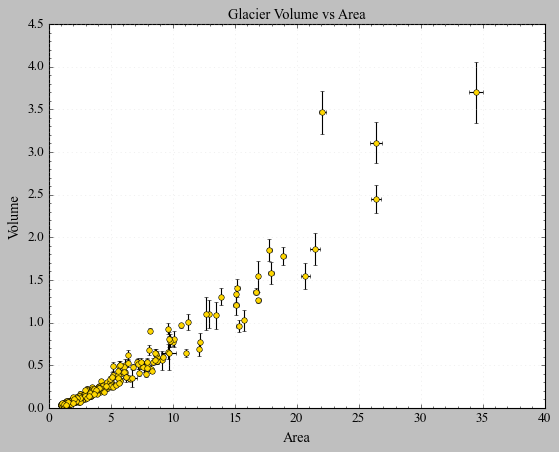

In [882]:

# Plot the glacier volume as a function of area

fig,ax = plt.subplots(figsize=(8,6))
ax.errorbar(Area, Volume, xerr=sigArea, yerr=sigVolume, fmt='o',ecolor='k',mfc='gold',ms=5, label='Data',c='blue')
ax.set(xlabel='Area', ylabel='Volume', title='Glacier Volume vs Area')


# plt.savefig('511_Glacier_Volume_vs_Area.pdf',bbox_inches='tight')

#which has the larges relative uncertainty?
mean_rel_err_A= np.mean(sigArea/Area)
error_on_mean_rel_err_A = np.std(sigArea/Area,ddof=1)*np.sqrt(1/len(Area))
print(f'Mean relative error on the Area = {mean_rel_err_A:.4f} +- {error_on_mean_rel_err_A:.5f}')
mean_rel_err_V= np.mean(sigVolume/Volume)
error_on_mean_rel_err_V = np.std(sigVolume/Volume,ddof=1)*np.sqrt(1/len(Volume))
print(f'Mean relative error on the Volume = {mean_rel_err_V:.3f} +- {error_on_mean_rel_err_V:.4f}')

C:\Users\simon\AppData\Local\Temp\ipykernel_5632\858206898.py:2: RuntimeWarning: overflow encountered in power
  exp = lambda x, a, b: a*x**b
c:\Users\simon\OneDrive\Andet\Sikkerhedskopiering\GitHub\AppStat2022\FINAL_EXAM_2023\MyExternalFunctionsForExam.py:789: RuntimeWarning: overflow encountered in square
  chi2 = np.sum(self.weights*(self.y - f)**2/self.sy**2)
C:\Users\simon\AppData\Local\Temp\ipykernel_5632\858206898.py:2: RuntimeWarning: overflow encountered in multiply
  exp = lambda x, a, b: a*x**b
c:\Users\simon\OneDrive\Andet\Sikkerhedskopiering\GitHub\AppStat2022\FINAL_EXAM_2023\MyExternalFunctionsForExam.py:789: RuntimeWarning: overflow encountered in true_divide
  chi2 = np.sum(self.weights*(self.y - f)**2/self.sy**2)


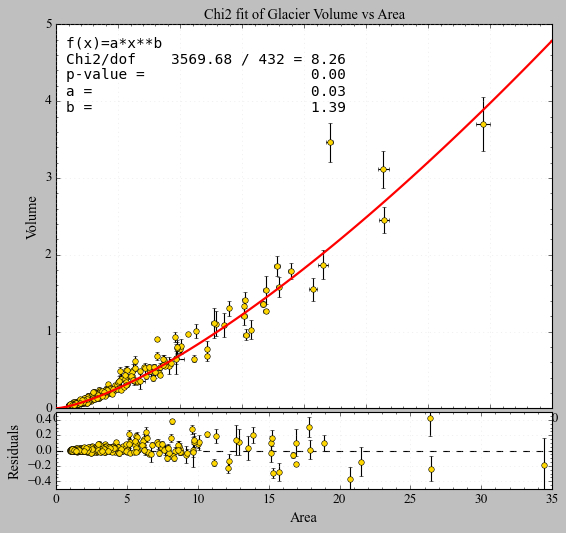

In [900]:
# Plot the glacier volume as a function of area, and fit the relation between the two as V~A**(3/2).
exp = lambda x, a, b: a*x**b    
Chi2 = Chi2Regression(exp, Area, Volume, sigVolume)
minuit = Minuit(Chi2, a=1, b=1)
minuit.migrad()
a , b , a_err, b_err = *minuit.values , *minuit.errors
pval , chistring = Chi2prob(minuit, len(Volume))

x = np.linspace(0,40,100)
fig,ax = plt.subplots(figsize=(8,6))
ax.errorbar(Area, Volume, xerr=sigArea, yerr=sigVolume, fmt='o',ecolor='k',mfc='gold',ms=5, label='Data',c='blue')
ax.set(xlabel='Area', ylabel='Volume', title='Chi2 fit of Glacier Volume vs Area')
ax.plot(x, exp(x, *minuit.values), 'r-', label='Fit',lw=2,zorder=10)
res_ax  = ax.inset_axes([0, -0.21, 1,0.2])
res_ax.errorbar(Area, Volume-exp(Area, *minuit.values), yerr=sigVolume, fmt='o',ecolor='k',mfc='gold',ms=5, label='Data',c='blue')
res_ax.set(xlabel='Area', ylabel='Residuals', ylim=(-0.5,0.5))
res_ax.axhline(0, c='k', ls='--', lw=1)


d = {'f(x)=a*x**b ':'','Chi2/dof':chistring,'p-value =': pval, 'a =':a ,'b =': b}
text = nice_string_output(d, extra_spacing=0, decimals=2)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=13)


# plt.savefig('512_FIT_Volume_vs_Area.pdf',bbox_inches='tight')

C:\Users\simon\AppData\Local\Temp\ipykernel_5632\875133312.py:4: RuntimeWarning: overflow encountered in power
  return a*x**b + N1*stats.norm.pdf(x, mu1, s1)
c:\Users\simon\OneDrive\Andet\Sikkerhedskopiering\GitHub\AppStat2022\FINAL_EXAM_2023\MyExternalFunctionsForExam.py:789: RuntimeWarning: overflow encountered in square
  chi2 = np.sum(self.weights*(self.y - f)**2/self.sy**2)
C:\Users\simon\AppData\Local\Temp\ipykernel_5632\875133312.py:4: RuntimeWarning: overflow encountered in multiply
  return a*x**b + N1*stats.norm.pdf(x, mu1, s1)
c:\Users\simon\OneDrive\Andet\Sikkerhedskopiering\GitHub\AppStat2022\FINAL_EXAM_2023\MyExternalFunctionsForExam.py:789: RuntimeWarning: overflow encountered in true_divide
  chi2 = np.sum(self.weights*(self.y - f)**2/self.sy**2)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3570                       │              Nfcn = 549              │
│ EDM = 6.91e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │   Hesse FAILED   │APPROXIMATE│NOT pos. def.│ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 2.7927e-2 │ 0.0000e-2 │            │            │         │         │       │
│ 1 │ b    │  1.3946   │  0.0000   │            │            │         │         │       │
│ 2 │ mu1  │-3.3115e-1 │ 0.0000e-1 │            │            │         │         │       │
│ 3 │ s1   │ 1.2213e-1 │ 0.0000e-1 │            │            │         │         │       │
│ 4 │ N1   │     1     │     0     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

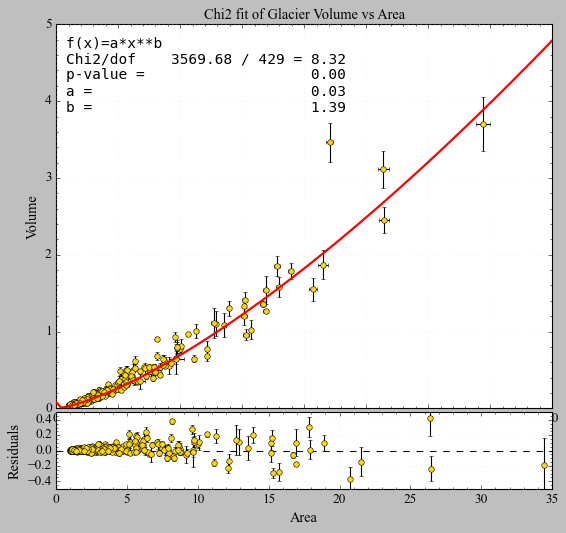

In [911]:
#find a better fitting function

def func(x, a, b, mu1,s1,N1):
    return a*x**b + N1*stats.norm.pdf(x, mu1, s1) 


Chi2 = Chi2Regression(func, Area, Volume, sigVolume)
minuit = Minuit(Chi2, a=1, b=1, mu1=1, s1=1, N1=1)
minuit.migrad()
pval , chistring = Chi2prob(minuit, len(Volume))

x = np.linspace(0,40,100)
fig,ax = plt.subplots(figsize=(8,6))
ax.errorbar(Area, Volume, xerr=sigArea, yerr=sigVolume, fmt='o',ecolor='k',mfc='gold',ms=5, label='Data',c='blue')
ax.set(xlabel='Area', ylabel='Volume', title='Chi2 fit of Glacier Volume vs Area')
ax.plot(x, func(x, *minuit.values), 'r-', label='Fit',lw=2,zorder=10)
res_ax  = ax.inset_axes([0, -0.21, 1,0.2])
res_ax.errorbar(Area, Volume-func(Area, *minuit.values), yerr=sigVolume, fmt='o',ecolor='k',mfc='gold',ms=5, label='Data',c='blue')
res_ax.set(xlabel='Area', ylabel='Residuals', ylim=(-0.5,0.5))
res_ax.axhline(0, c='k', ls='--', lw=1)


d = {'f(x)=a*x**b ':'','Chi2/dof':chistring,'p-value =': pval, 'a =':a ,'b =': b}
text = nice_string_output(d, extra_spacing=0, decimals=2)
add_text_to_ax(0.02, 0.97, text, ax, fontsize=13)


# plt.savefig('512_FIT_Volume_vs_Area.pdf',bbox_inches='tight') 

minuit